### DATA620 - Week 2 - Project 1
#### Michael Ippolito
6/8/2022

For your first project, you are asked to

1. Identify and load a network dataset that has some categorical information available for each node.
1. For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
1. Compare your centrality measures across your categorical groups.

For example, using the dataset from a study of romantic relationships among high school students in Columbus, Ohio [http://researchnews.osu.edu/archive/chains.htm], you might want to determine if there are any differences in your calculated centrality measures between the two sexes.  You might use a t-test or another statistical measure to support your findings.

You may work in a small group.  Your project should be delivered in an Jupyter Notebook, and posted in GitHub.  Your project is due end of day Sunday. You and your team should created a video presentation about your project. You should be ready to present your project in our Meet-up.

### Background

For this assignment I used a dataset from

https://sites.google.com/site/ucinetsoftware/datasets/covert-networks/london-gang?authuser=0

The data includes relationship ties among 54 members of a street gang in London from 2005 to 2009.

### Dataset Description

The data is presented in two CSV files, one giving a matrix of undirected relationships among members, along with a value from 0 to 4 that indicates the type of relationship:

* 0 (no relationship)
* 1 (hang out together)
* 2 (co-offend together)
* 3 (co-offend together, serious crime)
* 4 (co-offend together, serious crime, kin)

Metadata on each person (node) is also given. Little to no description was given; presumed descriptions are as follows:

* Age (member's age)
* Birthplace (1=West Africa, 2=Caribbean, 3=UK, 4=East Africa)
* Residence (0 or 1, whether the member is a UK resident)
* Arrests (number of arrests)
* Convictions (number of convictions)
* Prison (0 or 1, whether the member was sent to prison as a result of one or more convictions)
* Music (0 or 1, unclear what this means)
* Ranking (1 to 5, unclear what this means)


### Approach

The analysis will be performed as follows:

1. Load the data from CSVs.
1. Create a NetworkX graph by generating nodes and edges from the data.
1. Calculate centrality statistics based on the graph.
1. Perform a t-test on the means of both degree centraility and eigenvector centrality between prisoners and non-prisoners.
1. Evaluate the test statistics to determine whether there is a difference of means, the null hypothesis being that there is no difference between means.


In [27]:
# Load libraries
import networkx as net
import matplotlib.pyplot as plt
import csv
import numpy as np
from scipy import stats
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'jupyterlab'    # set ploty renderer so graphs show up in HTML output


In [17]:
# Create graph
g = net.Graph()

# Load gang member attributes
fh = open('LONDON_GANG_ATTR.csv', 'r')
rdr = csv.reader(fh)

# Get the header from the first line of the csv and rename the id field; the header row looks like this:
# "",Age,Birthplace,Residence,Arrests,Convictions,Prison,Music,Ranking
hdr = next(rdr, None)
hdr[0] = 'mbr_id'

# Read in the attribute data; each row will look like this
# 1,20,1,0,16,4,1,1,1
node_array = [row for row in rdr]

# Create a dict out of the node data
dnodes = {}
for e in node_array:
    dtmp = {}
    
    # Iterate through each field in the header, assigning values to the dict
    for i, h in enumerate(hdr):

        # No need to add the id field to the dict, since this is already the dict's key
        if h != 'mbr_id':
            dtmp[h] = int(e[i])
    
    # Add the node to the dict and the graph
    dnodes[int(e[0])] = dtmp
    g.add_node(int(e[0]))

fh.close()


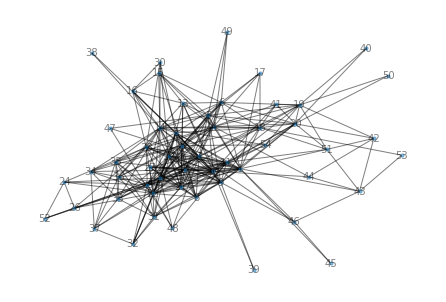

In [18]:
# Load member relationship data
fh = open('LONDON_GANG.csv', 'r')
rdr = csv.reader(fh)

# Get the header from first line and rename the id field;
# the first few columns of the header look like this, with each column being a node id:
# "",1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22 ...
hdr = next(rdr, None)
hdr[0] = 'mbr_id'

# Read in the relationships; each row will look like this, with the first column being the node id:
# 1,0,1,1,2,1,1,2,3,2,2,3,1,0,0,0,0,1,1,0,2,2,3,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0
for row in rdr:
    node1 = int(row[0])        # first element will the the id of the first node
    
    # Each row contains a list of relationship values
    for i in range(1, len(row)):
        
        node2 = int(hdr[i])    # the node id of the second node will be in the header for this column
        rel = int(row[i])      # the relationship value for this node-node pair

        # Add the node if it isn't the identity diagonal and if there is a non-zero relationship
        if node1 != node2 and rel != 0:
            g.add_edge(node1, node2, rel=rel)
            #print(node1, node2, rel)

fh.close()

# Display graph
net.draw(g, with_labels=True, node_size=10, font_size=10, alpha=0.5, width=1)


### Exploratory Data Analysis

Examine degree and eigenvector centralities.


In [28]:
# Degree centrality
print("Degree centrality:")
print(g.degree())
print()

# Eigenvector centrality
print("Eigenvector centrality:")
print(net.eigenvector_centrality(g))
print()


Degree centrality:
[(1, 25), (2, 22), (3, 22), (4, 21), (5, 19), (6, 16), (7, 25), (8, 15), (9, 21), (10, 22), (11, 18), (12, 25), (13, 11), (14, 24), (15, 7), (16, 8), (17, 5), (18, 14), (19, 13), (20, 15), (21, 19), (22, 24), (23, 23), (24, 6), (25, 23), (26, 6), (27, 8), (28, 18), (29, 17), (30, 5), (31, 12), (32, 7), (33, 10), (34, 8), (35, 12), (36, 12), (37, 7), (38, 2), (39, 2), (40, 2), (41, 5), (42, 5), (43, 6), (44, 4), (45, 2), (46, 5), (47, 3), (48, 5), (49, 3), (50, 2), (51, 7), (52, 4), (53, 2), (54, 6)]

Eigenvector centrality:
{1: 0.236657021947448, 2: 0.22909462474624814, 3: 0.2169694517358045, 4: 0.17471026885621538, 5: 0.17387852361649495, 6: 0.14864363486244733, 7: 0.2433470901698206, 8: 0.18283229048634403, 9: 0.215686487342014, 10: 0.2224482461593444, 11: 0.18740596328795753, 12: 0.24942870058999023, 13: 0.11421610313021918, 14: 0.2058069730896697, 15: 0.0652172836256356, 16: 0.07519619792685812, 17: 0.05062611516741732, 18: 0.12731639557188454, 19: 0.079246805591

In [30]:
# Assign degree centrality for those in prison vs not
for k in dnodes.keys():
    dnodes[k]['deg'] = g.degree(k)
    dnodes[k]['ev'] = net.eigenvector_centrality(g)[k]
deg_nonprison = [d[1] for d in g.degree() if dnodes[d[0]]['Prison'] == 0]
deg_prison = [d[1] for d in g.degree() if dnodes[d[0]]['Prison'] == 1]

# Print degree centrality stats for those not in prison
print("Degree centrality for those not in prison:")
print(deg_nonprison)
print("Min: ", np.min(deg_nonprison))
print("Max: ", np.max(deg_nonprison))
print("Mean: ", np.mean(deg_nonprison))
print("Median: ", np.median(deg_nonprison))
print("Std dev: ", np.std(deg_nonprison))
print()

# Print degree centrality stats for those in prison
print("Degree centrality for those in prison:")
print(deg_prison)
print("Min: ", np.min(deg_prison))
print("Max: ", np.max(deg_prison))
print("Mean: ", np.mean(deg_prison))
print("Median: ", np.median(deg_prison))
print("Std dev: ", np.std(deg_prison))
print()



Degree centrality for those not in prison:
[21, 19, 16, 25, 21, 25, 24, 5, 15, 19, 24, 6, 6, 8, 12, 7, 10, 12, 7, 2, 2, 5, 5, 6, 4, 3, 3, 2, 7, 4]
Min:  2
Max:  25
Mean:  10.833333333333334
Median:  7.0
Std dev:  7.767811074484811

Degree centrality for those in prison:
[25, 22, 22, 15, 22, 18, 11, 7, 8, 14, 13, 23, 23, 18, 17, 5, 8, 12, 2, 2, 5, 5, 2, 6]
Min:  2
Max:  25
Mean:  12.708333333333334
Median:  12.5
Std dev:  7.502661564775234



In [31]:
# Assign eigenvector centrality for those in prison vs not
ev_nonprison = [v for k, v in net.eigenvector_centrality(g).items() if dnodes[k]['Prison'] == 0]
ev_prison = [v for k, v in net.eigenvector_centrality(g).items() if dnodes[k]['Prison'] == 1]

# Print eigenvector centrality stats for those not in prison
print("Eigenvector centrality for those not in prison:")
print(ev_nonprison)
print("Min: ", np.min(ev_nonprison))
print("Max: ", np.max(ev_nonprison))
print("Mean: ", np.mean(ev_nonprison))
print("Median: ", np.median(ev_nonprison))
print("Std dev: ", np.std(ev_nonprison))
print()

# Print eigenvector centrality stats for those in prison
print("Eigenvector centrality for those in prison:")
print(ev_prison)
print("Min: ", np.min(ev_prison))
print("Max: ", np.max(ev_prison))
print("Mean: ", np.mean(ev_prison))
print("Median: ", np.median(ev_prison))
print("Std dev: ", np.std(ev_prison))
print()


Eigenvector centrality for those not in prison:
[0.17471026885621538, 0.17387852361649495, 0.14864363486244733, 0.2433470901698206, 0.215686487342014, 0.24942870058999023, 0.2058069730896697, 0.05062611516741732, 0.10320090206015388, 0.21530464953631728, 0.2351956670087189, 0.055809162729650946, 0.055809162729650946, 0.10528411057634135, 0.12620154526079508, 0.07479043010162996, 0.09525632012351401, 0.11438907657538212, 0.056383044878599804, 0.025565478250753434, 0.025755480755314714, 0.046751217194967006, 0.016297562572602016, 0.02219180807892522, 0.027195589458704702, 0.027656922999919654, 0.029229946019754573, 0.010725356168024783, 0.04540073706098806, 0.03286571738564915]
Min:  0.010725356168024783
Max:  0.24942870058999023
Mean:  0.10031292270734757
Median:  0.06558673749011489
Std dev:  0.07750618215843928

Eigenvector centrality for those in prison:
[0.236657021947448, 0.22909462474624814, 0.2169694517358045, 0.18283229048634403, 0.2224482461593444, 0.18740596328795753, 0.114216

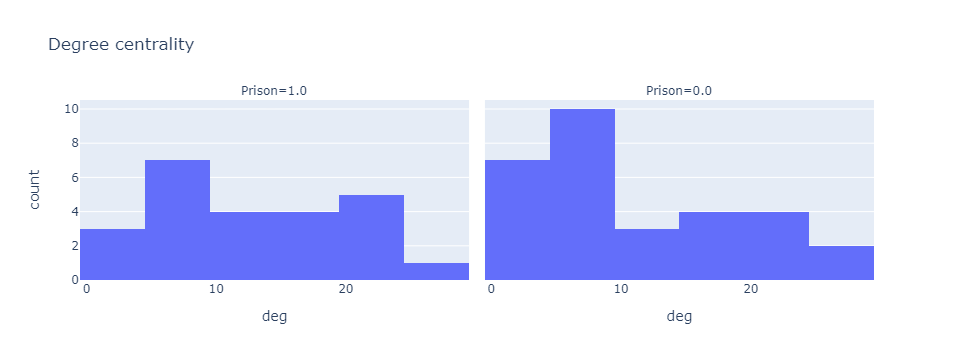

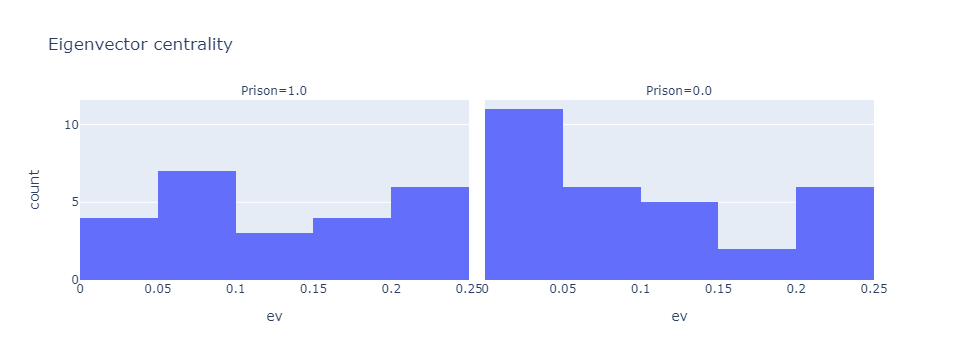

In [26]:
# Convert nodes into a data frame for graphing purposes
dfnodes = pd.DataFrame(dnodes).transpose()

# Histogram of degree centrality
fig = px.histogram(dfnodes, x='deg', facet_col='Prison', nbins=10, title='Degree centrality')
fig.show()

# Histogram of eigenvector centrality
fig = px.histogram(dfnodes, x='ev', facet_col='Prison', nbins=10, title='Eigenvector centrality')
fig.show()


### Analysis

Perform a t-test on the means between prisoners and non-prisoners. It should be noted that, while the samples are presumed to be independent, the distributions don't appear to be normal, so the conditions for performing a t-test aren't optimal.


In [21]:
# Compare degree centrality for those in prison vs not
# using a t-test on a difference of means
deg_stats = stats.ttest_ind(deg_nonprison, deg_prison, equal_var=False)
print("p-value:", deg_stats[1])

# Compare eignvector centrality for those in prison vs not
# using a t-test on difference of means
ev_stats = stats.ttest_ind(ev_nonprison, ev_prison, equal_var=False)
print("p-value:", ev_stats[1])


p-value: 0.3824531061234264
p-value: 0.271002653610952


### Conclusion

Based on the p-value of 0.38 and 0.27, we cannot reject the null hypothesis that there is no difference in means. This indicates that my hypothesis that prisoners have a higher degree and eigenvector centrality than non-prisoners was incorrect; the means are not statistically different.
